## Mounting gDrive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Setup system

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import matplotlib.cm as cm
import random

In [24]:
workingDir=os.getcwd()
print(workingDir)

experimentDir=workingDir+"/drive/My Drive/pHT/ms/data/Fig_1/"
experimentDir=workingDir+"/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_1/"

figuresDir=workingDir+"/drive/My Drive/SYNC_Projects/pHT/ms/figures/"

list_populations_names=["pBGT",
                        "HT-1505-1","HT-1505-2","HT-1505-3",
                        "pBRT"];
list_populations_files=os.listdir(workingDir)
list_populations_files.sort()
list_populations_files

/content


['.config', 'drive', 'sample_data']

In [0]:
colors=[(100,34,101),(92,204,192),(27,68,28)]
cmap=make_cmap(colors, bit=True)

## Loading Auxiliary functions


In [0]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(phi, rho)


def plot_polar_fancy(ax,this_df,ref_df,alph,llim,name,angle_type):
    
    if(angle_type=="phis_N01"):
        rho_type="rhos_N01"
    elif(angle_type=="phis_01"):
        rho_type="rhos_01"
    ##poopulation data
    phis01=this_df[angle_type]
    rhos01=this_df[rho_type]
    #  meanPhi_Nrot,maxRho_N,meanRho_N  
    colors=cmap([1-x/np.pi for x in phis01])
    ax.scatter(phis01, rhos01,s=10,c=colors,alpha=alph)
    
    this_moments=st.describe(phis01)
    print(this_moments)
    
    
    lphimean=np.mean(phis01)
    lrhomean=np.mean(rhos01)
    
    phisrmode=[round(p,1) for p in phis01]
    rhosrmode=[round(r,1) for r in rhos01]
    p=st.mode(phisrmode)
    r=st.mode(rhosrmode)
    lphimode=p.mode[0]
    lrhomode=r.mode[0]

    
    ####population metrics
    if(ref_df.empty):
    
        ax.scatter(lphimean,lrhomean,s=30,c='k',zorder=3)
        #ax.scatter(lphimode,lrhomode,s=30,c='b',zorder=3)
        #print(".")
    if(not ref_df.empty):
        phis01=list(ref_df[angle_type])
        rhos01=list(ref_df[rho_type])
        refphimean=np.mean(phis01)
        refrhomean=np.mean(rhos01)
        #ax.scatter(refphimean,refrhomean,s=30,c='k',zorder=3)
        
        ax.annotate("", xy=(lphimean, lrhomean), xytext=(refphimean,refrhomean),  arrowprops=dict(arrowstyle="->",color='k',lw=1))
        
        phisrmode=[round(p,1) for p in phis01]
        rhosrmode=[round(r,1) for r in rhos01]
        p=st.mode(phisrmode)
        r=st.mode(rhosrmode)
        refphimode=p.mode[0]
        refrhomode=r.mode[0]
        #ax.scatter(refphimode,refrhomode,s=30,c='b',zorder=3)
        
        #ax.annotate("", xy=(lphimode, lrhomode), xytext=(refphimode,refrhomode),  arrowprops=dict(arrowstyle="->",color='b',lw=1))
        
        
        
    ax.set_rmax(1)
    ax.set_rticks(ticks=[])
    ax.set_thetamin(-llim)
    ax.set_thetamax(180+llim)
    ax.grid(False)
    ax.set_thetagrids([0,90,180],labels=["G1","Plasmid Fraction","R12"],fontsize=12)
    #ax.set_title("%s"%(pop), va='bottom')
    ax.set_title(name, va='bottom',fontweight='bold')
    ax.title.set_position([.5, .9])
    return ax

def plot_Raw_flourescence(data1,data2,title,name1,name2,lg,lr):
    fig,ax= plt.subplots( figsize=(10,5))
    
    xm=np.mean(data1)
    ym=np.mean(data2)
    
    ax.scatter(data1,data2,s=5,alpha=.05)
    ax.scatter(xm,ym,c='r')
    #ax.set_aspect('equal')
    ax.grid(True)
    ax.set_xlim(left=0)
    if(lg):
        ax.set_xlim(right=lg)
    ax.set_ylim(bottom=0)
    
    if(lr):
        ax.set_ylim(top=lr)
    
    ax.set_title(title, va='bottom')
    ax.set_xlabel(name1)
    ax.set_ylabel(name2)

    lregGFP=linregress(data1,data2)
    x_vals = np.array(ax.get_xlim())
    y_vals = lregGFP.intercept + lregGFP.slope * x_vals
    ax.plot(x_vals, y_vals, '--g')

    return plt

def make_cmap(colors, position=None, bit=False):
  bit_rgb = np.linspace(0,1,256)
  if position == None:
    position = np.linspace(0,1,len(colors))
  else:
    if len(position) != len(colors):
      sys.exit("position length must be the same as colors")
    elif position[0] != 0 or position[-1] != 1:
      sys.exit("position must start with 0 and end with 1")

  if bit:
    for i in range(len(colors)):
      colors[i] = (bit_rgb[colors[i][0]], bit_rgb[colors[i][1]], bit_rgb[colors[i][2]])
    
  cdict = {'red':[], 'green':[], 'blue':[]}

  for pos, color in zip(position, colors):
    cdict['red'].append((pos, color[0], color[0]))
    cdict['green'].append((pos, color[1], color[1]))
    cdict['blue'].append((pos, color[2], color[2]))
    cmap = cm.colors.LinearSegmentedColormap('my_colormap',cdict,256)
  return cmap




## Loading data files & creating DataFrame

In [5]:
dfs=[]

for pop_name,file in zip(list_populations_names,list_populations_files):
    file_name=workingDir+file
    print(pop_name,file_name)
    this_df=pd.read_csv(file_name,skiprows=3,sep='\t',skip_blank_lines=True)
        
    #this_ratio=this_gfp/this_rfp
        
        
    this_df.rename(columns={'Object Number':'ids','Intensity_MC_Ch02':'GFP','Intensity_MC_Ch04':'DsRed',}, inplace=True)
        
#    this_df=pd.DataFrame({"pop":pop_names,"ids":pop_id,"GFP":pop_gfp,"DsRed":pop_rfp,"ratio":pop_ratio,"phis":pop_phi,"rhos":pop_rho})
    
    ids=list(this_df["ids"])
    this_size=len(ids)
    popname_list=[pop_name]*this_size
        
    gfps=list(this_df["GFP"])
    rfps=list(this_df["DsRed"])
    
    pop_ratio=[]
    pop_phi=[]
    pop_rho=[]
    for g,r in zip(gfps,rfps):
        pop_ratio.append(g/r)
        phi,rho=cart2pol(g,r)
        pop_phi.append(phi)
        pop_rho.append(rho)
    df_temp=pd.DataFrame({"ids":ids,"pop":popname_list,"ratio":pop_ratio,"phis":pop_phi,"rhos":pop_rho})
        
    df=pd.merge(this_df,df_temp, on=["ids"])
    
    dfs.append(df)

df_pops_all=pd.concat(dfs)
df_pops_all.describe()

pBGT /content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_1/G1.txt
HT-1505-1 /content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_1/HT-0_chl-15_caz-05_rep-1.txt
HT-1505-2 /content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_1/HT-0_chl-15_caz-05_rep-2.txt
HT-1505-3 /content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_1/HT-0_chl-15_caz-05_rep-3.txt
pBRT /content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_1/R12.txt


,ids,Area_M01,Gradient RMS_M01_Ch01,Aspect Ratio_M01,GFP,DsRed,Intensity_MC_Ch12,ratio,phis,rhos
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,9999.500000,22.236527,68.691834,0.654589,13163.138232,2484.391300,3868.568870,9.249165,0.435081,14011.382448
std,5773.531552,5.680458,2.772384,0.096752,11455.077617,1846.195975,2134.270671,12.475959,0.547020,10851.204732
min,0.000000,8.333333,60.281862,0.231670,-463.500000,-150.034483,-1085.390625,-1730.794118,-3.111167,10.420622
25%,4999.750000,18.333333,67.541663,0.592383,6333.383523,1274.507723,2587.284483,3.471960,0.125990,7003.597537
50%,9999.500000,21.000000,69.107380,0.652326,11557.276900,2128.500000,3752.815000,4.860394,0.202641,11846.711847
75%,14999.250000,24.555556,70.543851,0.716284,18034.618138,3169.939236,4881.835938,7.854627,0.279099,18271.770606
max,19999.000000,155.444444,77.512480,0.998246,175709.666667,58842.193548,31283.574257,307.293578,3.083171,175812.853551


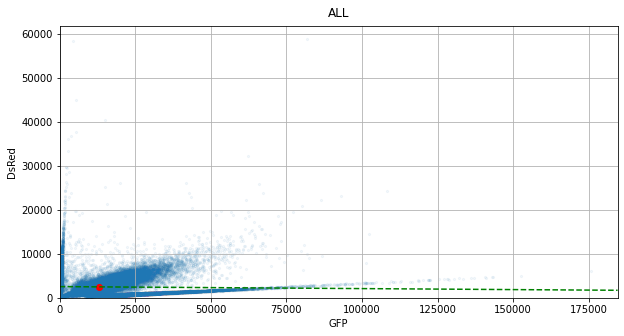

In [6]:
plt=plot_Raw_flourescence(df_pops_all["GFP"],df_pops_all["DsRed"],"ALL","GFP","DsRed",0,0)
plt.show()
plt.close()

## Set limits to GFP intensity and DsRed intensity

In [0]:
gfp_limit=70000
rfp_limit=20000
rfp_limit=15000



## Making a DataFrame with no extreme values 
## normalize values
## transform to polar coordinates

In [8]:
df_pops=df_pops_all[(df_pops_all["Aspect Ratio_M01"]>.3)&(df_pops_all["Aspect Ratio_M01"]<.8)&
                 (df_pops_all["Gradient RMS_M01_Ch01"]>65)&(df_pops_all["Gradient RMS_M01_Ch01"]<85)
                ]

df_pops_lim=df_pops[(df_pops["GFP"]<gfp_limit)&(df_pops["DsRed"]<rfp_limit)].copy()
gfpsN=df_pops_lim["GFP"]/gfp_limit
rfpsN=df_pops_lim["DsRed"]/rfp_limit
pops=df_pops_lim['pop']
ids=df_pops_lim['ids']

phis=[]
rhos=[]
for this_gfp,this_rfp in zip(gfpsN,rfpsN):
    this_phi,this_rho=cart2pol(this_gfp,this_rfp)
    phis.append(this_phi)
    rhos.append(this_rho)
    


tempDF=pd.DataFrame({"pop":pops,"ids":ids,"GFP_N":gfpsN,"DsRed_N":rfpsN,"phis_N":phis,"rhos_N":rhos})

df_pops_lim=pd.merge(df_pops_lim,tempDF,on=['pop','ids'])
df_pops_lim.tail()

,ids,Area_M01,Gradient RMS_M01_Ch01,Aspect Ratio_M01,GFP,DsRed,Intensity_MC_Ch12,pop,ratio,phis,rhos,GFP_N,DsRed_N,phis_N,rhos_N
82393,19988,35.666667,73.764972,0.681980,682.471154,7626.067308,6757.096154,pBRT,0.089492,1.481542,7656.544224,0.009750,0.508404,1.551622,0.508498
82394,19993,15.222222,73.614431,0.551380,256.307692,3409.533654,4403.062500,pBRT,0.075174,1.495764,3419.153897,0.003662,0.227302,1.554689,0.227332
82395,19994,17.666667,71.149294,0.643891,194.522727,1888.954545,3360.454545,pBRT,0.102979,1.468179,1898.944013,0.002779,0.125930,1.548733,0.125961
82396,19995,20.777778,66.785125,0.704495,238.570000,2081.405000,4486.020000,pBRT,0.114620,1.456675,2095.032797,0.003408,0.138760,1.546240,0.138802
82397,19998,27.555556,69.738051,0.636833,215.198276,3251.853448,3959.982759,pBRT,0.066177,1.504716,3258.966270,0.003074,0.216790,1.556616,0.216812


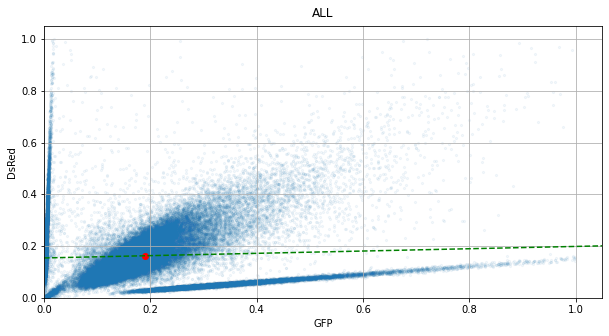

In [9]:
plt=plot_Raw_flourescence(df_pops_lim["GFP_N"],df_pops_lim["DsRed_N"],"ALL","GFP","DsRed",0,0)
plt.show()
plt.close()

## Transform values to center mean on $\pi/2$, set G1 to $0$ and R12 to $\pi$


In [10]:
df_pops_limR=df_pops_lim[df_pops_lim["pop"]=="pBRT"].copy()
df_pops_limR=df_pops_limR[(df_pops_limR["phis"]>df_pops_limR.phis.mean()-2*df_pops_limR.phis.std())
                         &(df_pops_limR["phis"]<df_pops_limR.phis.mean()+2*df_pops_limR.phis.std())
                         ]
df_pops_limG=df_pops_lim[df_pops_lim["pop"]=="pBGT"].copy()
df_pops_limG=df_pops_limG[(df_pops_limG["phis"]>df_pops_limG.phis.mean()-2*df_pops_limG.phis.std())
                         &(df_pops_limG["phis"]<df_pops_limG.phis.mean()+2*df_pops_limG.phis.std())
                         ]


minPhi_N=df_pops_limG.phis_N.mean()#-(df_pops_limG.phis_N.std()*2)
maxPhi_N=df_pops_limR.phis_N.mean()#+(df_pops_limR.phis_N.std()*2)

### Taking the reference mean from balanced population 
meanPhi_N=df_pops_lim[df_pops_lim["pop"].str.contains("HT-1505")].phis_N.mean()   

rot_theta_N=np.pi/2- meanPhi_N

phis_Nrot=df_pops_lim['phis_N']+rot_theta_N
rhosN=df_pops_lim['rhos_N']




meanPhi_Nrot=meanPhi_N+rot_theta_N
minPhi_Nrot=minPhi_N+rot_theta_N
maxPhi_Nrot=maxPhi_N+rot_theta_N


maxRhoN99=rhosN.mean()+3*rhosN.std()
rhosN01=rhosN/maxRhoN99

phisN01=[]

for this_phi in phis_Nrot:
    phi01=((this_phi-minPhi_Nrot)/(maxPhi_Nrot-minPhi_Nrot))*np.pi
    if(this_phi<meanPhi_Nrot):
        phi01=((this_phi-minPhi_Nrot)/(meanPhi_Nrot-minPhi_Nrot))*np.pi/2
    
    else:
        phi01=((this_phi-meanPhi_Nrot)/(maxPhi_Nrot-meanPhi_Nrot)+1)*np.pi/2
    
    phisN01.append(phi01)




pops=df_pops_lim['pop']
ids=df_pops_lim['ids']

#tempDF=pd.DataFrame({"pop":pops,"ids":ids,"phis_rot":phis_rot,"phis_01":phis01,"rhos_01":rhos01,"phis_Nrot":phis_Nrot,"phis_N01":phisN01,"rhos_N01":rhosN01})
tempDF=pd.DataFrame({"pop":pops,"ids":ids,"phis_N01":phisN01,"rhos_N01":rhosN01})

df_pops_lim2=pd.merge(df_pops_lim,tempDF,on=['pop','ids'])
df_pops_lim2.describe()







,ids,Area_M01,Gradient RMS_M01_Ch01,Aspect Ratio_M01,GFP,DsRed,Intensity_MC_Ch12,ratio,phis,rhos,GFP_N,DsRed_N,phis_N,rhos_N,phis_N01,rhos_N01
count,82398.000000,82398.000000,82398.000000,82398.000000,82398.000000,82398.000000,82398.000000,82398.000000,82398.000000,82398.000000,82398.000000,82398.000000,82398.000000,82398.000000,82398.000000,82398.000000
mean,10089.114857,21.400735,69.566450,0.634559,13328.377580,2437.185521,3833.881467,8.848502,0.347327,13964.996734,0.190405,0.162479,0.753010,0.272334,1.474896,0.395004
std,5757.396643,5.137434,1.879212,0.082678,9666.380279,1627.660470,1989.257933,11.986477,0.461210,9200.675841,0.138091,0.108511,0.411499,0.139037,0.932584,0.201665
min,0.000000,8.333333,65.000045,0.321819,-463.500000,-150.034483,-1085.390625,-1730.794118,-3.111167,10.420622,-0.006621,-0.010002,-3.000504,0.000264,-8.243275,0.000383
25%,5128.000000,18.000000,68.441670,0.583849,7954.193287,1325.448661,2641.776185,3.914820,0.133976,8229.186347,0.113631,0.088363,0.561462,0.181471,1.068960,0.263213
50%,10132.000000,20.333333,69.501989,0.638237,11858.458482,2140.122596,3747.585714,4.958646,0.198752,12131.713194,0.169407,0.142675,0.754438,0.243877,1.572803,0.353729
75%,15074.000000,23.444444,70.828112,0.693892,17534.952257,3114.738482,4801.064655,7.386402,0.249679,17803.284061,0.250499,0.207649,0.871940,0.328640,1.803712,0.476672
max,19999.000000,67.777778,77.110106,0.799997,69976.653846,14995.625000,31283.574257,307.293578,3.083171,70996.367517,0.999666,0.999708,2.875138,1.379146,5.740296,2.000368


DescribeResult(nobs=10420, minmax=(-7.594216590463122, 5.277543199290712), mean=3.13627923159635, variance=0.03523868630886962, skewness=-40.68570838193392, kurtosis=1891.6116869836942)
Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure1_pBRT_amnis.pdf
Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure1_pBRT_amnis.png


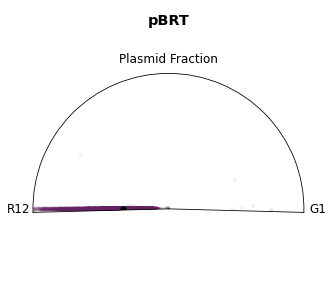

In [97]:

angle_type="phis_N01"
alpha=.05

fig= plt.figure( figsize=(5, 5))    
ax=fig.add_subplot(111,projection='polar') 
pop="pBRT"
this_df=df_pops_lim2[df_pops_lim2["pop"]==pop].copy()

ax=plot_polar_fancy(ax,this_df,pd.DataFrame(),alpha,llim,pop,angle_type)

fileName=figuresDir+'figure1_pBRT_amnis.pdf'
print("Saving "+fileName)
plt.savefig(fileName, rasterized=True)

fileName=figuresDir+'figure1_pBRT_amnis.png'
print("Saving "+fileName)
plt.savefig(fileName, rasterized=True)

plt.show()


DescribeResult(nobs=58033, minmax=(-8.243274569413868, 5.740295573600708), mean=1.5296411751603127, variance=0.19617799862978177, skewness=-2.5084336741504716, kurtosis=41.40808875014618)
Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure1_HT_amnis.pdf
Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure1_HT_amnis.png


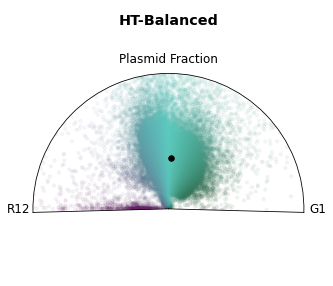

In [98]:

fig= plt.figure( figsize=(5, 5))    
ax=fig.add_subplot(111,projection='polar') 
pop="HT-Balanced"
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")].copy()
ax=plot_polar_fancy(ax,this_df,pd.DataFrame(),alpha,llim,pop,angle_type)

fileName=figuresDir+'figure1_HT_amnis.pdf'
print("Saving "+fileName)
plt.savefig(fileName, rasterized=True)

fileName=figuresDir+'figure1_HT_amnis.png'
print("Saving "+fileName)
plt.savefig(fileName, rasterized=True)

plt.show()



DescribeResult(nobs=13945, minmax=(-6.6425585581512285, 4.190925875006779), mean=0.005649654386295529, variance=0.0625334649538954, skewness=-0.4412175984841016, kurtosis=214.24975086256643)
Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure1_pBGT_amnis.pdf
Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure1_pBGT_amnis.png


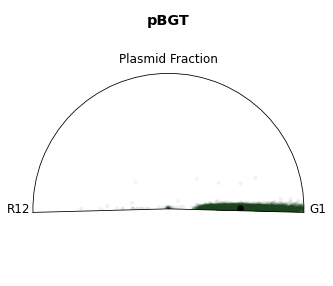

In [99]:

fig= plt.figure( figsize=(5, 5))    
ax=fig.add_subplot(111,projection='polar') 

pop="pBGT"
this_df=df_pops_lim2[df_pops_lim2["pop"]==pop].copy()
ax=plot_polar_fancy(ax,this_df,pd.DataFrame(),alpha,llim,pop,angle_type)

fileName=figuresDir+'figure1_pBGT_amnis.pdf'
print("Saving "+fileName)
plt.savefig(fileName, rasterized=True)

fileName=figuresDir+'figure1_pBGT_amnis.png'
print("Saving "+fileName)
plt.savefig(fileName, rasterized=True)

plt.show()

Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure1_raw_amnis.pdf
Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure1_raw_amnis.png


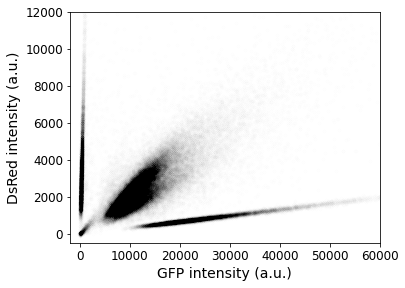

In [100]:
import matplotlib as mpl
from matplotlib.patches import Arc
from scipy.interpolate import interp1d

fig,ax= plt.subplots( figsize=(5.55, 4.25))

mpl.rcParams.update({'font.size':12})

df_tplt=df_pops_lim[(df_pops_lim["pop"]=="pBRT")|(df_pops_lim["pop"].str.contains("HT-"))|(df_pops_lim["pop"]=="pBGT")]
ax.scatter(df_tplt["GFP"],df_tplt["DsRed"],s=10,alpha=.002,color='black')
ax.set_xlabel("GFP intensity (a.u.)",fontsize=14)
ax.set_ylabel("DsRed intensity (a.u.)",fontsize=14)

ax.set_xlim([-2e3,6e4])
ax.set_ylim([-5e2,1.2e4])

#ax.set_xticks([])
#ax.set_yticks([])

#


fileName=figuresDir+'figure1_raw_amnis.pdf'
print("Saving "+fileName)
plt.savefig(fileName, rasterized=True)


fileName=figuresDir+'figure1_raw_amnis.png'
print("Saving "+fileName)
plt.savefig(fileName, rasterized=True)

plt.show()


        